<a href="https://colab.research.google.com/github/utdsimmons/tvb/blob/main/tvb_branching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# import tvb library
%pip install tvb-library
%pylab inline
import os
from tvb.simulator.lab import *
LOG = get_logger('demo')
import pickle as cPickle
from tvb.simulator.models.stefanescu_jirsa import ReducedSetHindmarshRose


Populating the interactive namespace from numpy and matplotlib


In [46]:
# download the data set and get the path
! wget -c -O connectivity_66.zip --no-check-certificate https://raw.githubusercontent.com/utdsimmons/tvb/main/testing_data/connectivity_66.zip
path = os.path.abspath("connectivity_66.zip")
print(path)

--2020-12-31 23:12:57--  https://raw.githubusercontent.com/utdsimmons/tvb/main/testing_data/connectivity_66.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

/content/connectivity_66.zip


In [47]:
# The main simulation parameters
sim = simulator.Simulator(
    model=ReducedSetHindmarshRose(), 
    connectivity=connectivity.Connectivity.from_file(path),                      
    coupling=coupling.Linear(a=np.array([0.02])),
    simulation_length=1e3,
    integrator=integrators.HeunStochastic(dt=0.01220703125, noise=noise.Additive(nsig=np.array([0.00001]), ntau=0.0,
                                                                                random_stream=np.random.RandomState(seed=42))),
    monitors=(
       monitors.TemporalAverage(period=1.),
       monitors.Raw(),
       monitors.ProgressLogger(period=1e2)
    )
).configure()

WARNING  File 'average_orientations' not found in ZIP.
WARNING  File 'cortical' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'areas' not found in ZIP.


In [48]:
# Run the simulation
(tavg_time, tavg_data), (raw_time, raw_data),_ = sim.run()

   INFO  step 1 time 0.0000 s
   INFO  step 8193 time 0.1000 s
   INFO  step 16385 time 0.2000 s
   INFO  step 24577 time 0.3000 s
   INFO  step 32769 time 0.4000 s
   INFO  step 40961 time 0.5000 s
   INFO  step 49153 time 0.6000 s
   INFO  step 57345 time 0.7000 s
   INFO  step 65537 time 0.8000 s
   INFO  step 73729 time 0.9000 s


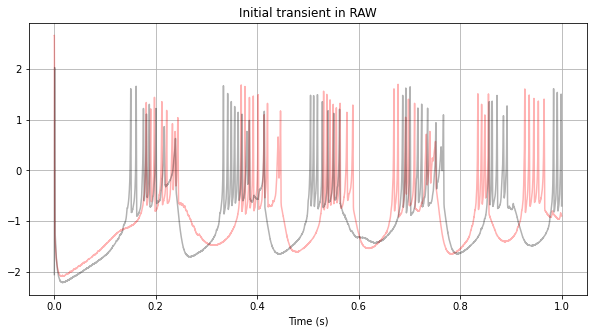

In [49]:
# results visualization
figure(figsize=(10, 5))
plot(raw_time * 1e-3, raw_data[:, 0, :, 0], "r", alpha=0.3)
plot(raw_time * 1e-3, raw_data[:, 0, :, 0], "k", alpha=0.3)
title('Initial transient in RAW')
xlabel('Time (s)')
grid(True);



In [50]:
# using pickle to do the branching
sim_state_fname = 'sim_state.pickle'

with open(sim_state_fname, 'wb') as file_descr:
    cPickle.dump({
        'history': sim.history.buffer,
        'current_step': sim.current_step,
        'current_state': sim.current_state,
        'rng': sim.integrator.noise.random_stream.get_state()
    }, file_descr)

In [51]:
!ls -lh sim_state.pickle

-rw-r--r-- 1 root root 9.9M Dec 31 23:14 sim_state.pickle


In [52]:
# clear the previous simulation
del sim

In [53]:
# setting parameters again
sim = simulator.Simulator(
    model=ReducedSetHindmarshRose(), 
    connectivity=connectivity.Connectivity.from_file(path),                      
    coupling=coupling.Linear(a=np.array([0.02])),
    simulation_length=1e3,
    integrator=integrators.HeunStochastic(dt=0.01220703125, noise=noise.Additive(nsig=np.array([0.00001]), ntau=0.0,
                                                                                random_stream=np.random.RandomState(seed=42))),
    monitors=(
       monitors.TemporalAverage(period=1.),
       monitors.Raw(),
       monitors.ProgressLogger(period=1e2)
    )
).configure()

WARNING  File 'average_orientations' not found in ZIP.
WARNING  File 'cortical' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'areas' not found in ZIP.


In [54]:
# loading the previous states
with open(sim_state_fname, 'rb') as file_descr:
    state = cPickle.load(file_descr)

sim.history.buffer = state['history']
sim.current_step = state['current_step']
sim.current_state = state['current_state']
sim.integrator.noise.random_stream.set_state(state['rng'])

In [55]:
# run simulation again
(tavg_time, tavg_data), (raw_time, raw_data),_ = sim.run()

   INFO  step 81921 time 1.0000 s
   INFO  step 90113 time 1.1000 s
   INFO  step 98305 time 1.2000 s
   INFO  step 106497 time 1.3000 s
   INFO  step 114689 time 1.4000 s
   INFO  step 122881 time 1.5000 s
   INFO  step 131073 time 1.6000 s
   INFO  step 139265 time 1.7000 s
   INFO  step 147457 time 1.8000 s
   INFO  step 155649 time 1.9000 s


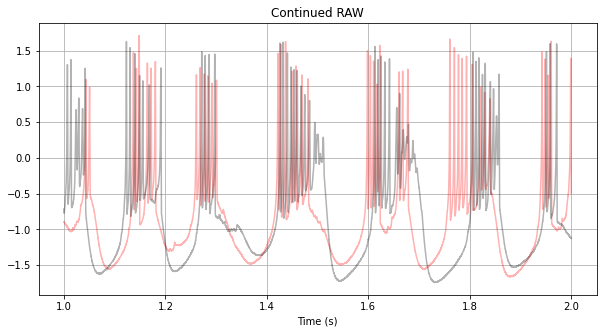

In [56]:
# visualize the results
figure(figsize=(10, 5))
plot(raw_time * 1e-3, raw_data[:, 0, :, 0], "r", alpha=0.3)
plot(raw_time * 1e-3, raw_data[:, 0, :, 0], "k", alpha=0.3)
title('Continued RAW')
xlabel('Time (s)')
grid(True);

